In [1]:
%load_ext autoreload
%autoreload 1

# Hands on Tutorial 1

# Introduction

When designing a synchrotron, the first thing to do is to make sure that the particles will be transversely guided, i.e. stay in the vicinity of a given closed orbit. This is the basic idea of linear optics. In linear optics we use linear magnets, i.e. **dipoles** (constant magnetic field) and **quadrupoles** (magnetic field is linear with transverse position). Around a given ring one places a set of identical **FODO** cells, in a periodic manner. The more symmetric is a machine, the better. The FODO cell will be the basic building block of the ring. Each FODO cell is made of one **focusing quadrupole**, one or several **dipoles**, one **defocusing quadrupole** and again one or several **dipoles** (using the same number as before). Between those elements there can be some unused space, or **drift** space. In practice in a real machine, many other elements and diagnostics instruments are put in these spaces, but we do not consider them now. Note that from the point of view of linear optics in the thin lens approximation, a dipole is equivalent to a drift space (weak focusing is neglected). Dipoles are there only to guide the beam along the orbit, while quadrupoles focus it so that it stays near this orbit.

In a previous tutorial, you have started the design of a small storage ring by hand. The purpose of the next four tutorials is to show that such a design can be done in an easier way using **python**. We will walk you through the first steps of the design of a collider.  The most interesting part is, however, not the coding: we would like you to understand what you are observing in the output of the code and to improve your understanding of the pysics involved. We will ask you some questions to guide you.

At the end of the four sessions, you have the possibility to **hand in a small report (4-5 pages max!), summarizing your results**, i.e. plots and answers to the questions. The goal is to show that you are able to extract useful information to guide the design of a machine and to understand the physical ideas behind it. To help you write your report, try to keep track of what you are doing, e.g. collect the different plots, interpret physically the obtained results, etc.


# Jupyter notebook

You will be using [jupyter notebooks](https://jupyter.org/) to run some code. Jupyter is a web based code block frontend for [python](https://www.python.org/).

For those of you who have never used python or want to brush up on the basics, we recommend  having a look at https://www.pythoncheatsheet.org/ for some syntax reminders. **No advanced knowledge of python will be required.**

You will be using an accelerator tool box package, for the curious, the source code is located [here](https://github.com/loiccoyle/accelerator).

In [2]:
# let's import everything from the toolbox
from accelerator import *
import numpy as np

# Exercise 1

We will the machine that you already studied in a previous tutorial. To remind you, the parameters of the this machine are listed bellow:
 * Particles: proton
 * Kinetic energy: 15 GeV
 * Circumference: 1000 m
 * Quadrupole length: 3 m
 * Dipole length: 5 m
 * Maximum magnetic field in dipoles: 2 T
 * 8 FODO cells

During the last tutorial, you have found the number of FODO cells and the strength of the dipoles required to close the ring.

**Set the correct values for `n_cells`, `dipole_angle` and `dipole_bending_radius`.**

**What do you observe? What happens if you play with the dipole field strength? Why?**

In [3]:
cirumference = 1000  # meters
proton_energy = 15  # GeV
dipole_length = 5  # meters
dipole_B_max = 2  # T

In [4]:
n_cells = 8  # ??
dipole_angle = np.pi / 16  # ??

In [5]:
cell_length = cirumference / n_cells
drift = Drift(cell_length / 6)
dipole = DipoleThin(dipole_angle)
# We create the repeating FODO cell (containing only dipoles)
FODO = Lattice([drift, dipole, drift, dipole, drift, drift, dipole, drift, dipole, drift])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

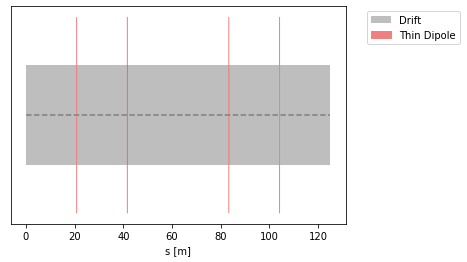

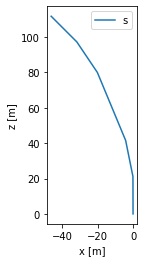

In [6]:
# let's have a look at our 'FODO'
FODO.plot.lattice()
FODO.plot.top_down()

In [7]:
# We repeat it to create the full lattice
lattice = FODO * n_cells

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

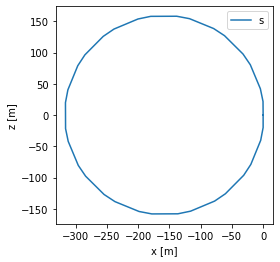

In [8]:
lattice.plot.top_down()

# Exercise 2

The synchrotron obtained up to now, containing only dipoles, will not work, we have to add quadrupoles. **Why?**

During the last tutorial, you computed the strength of the quadrupole in the FODO cell, such that the maximum of the β-function is 300 m. In the approximation that was used the maximum of the function in a FODO cell is given by:

$\beta_{max} = \frac{2f (1+\frac{L}{4f})}{\sqrt{1 - \frac{L^2}{16f^2}}}$

**What is the approximation used in this formula?** Solving this equation for $\beta_{max}= 300m$ you should have found in Tutorial 4 the integrated gradient, i.e. the inverse of the focal length, as well as the quadrupolar strength.

In [9]:
quad_focal_length = 1 / 8.89e-3 # ??

In [10]:
quad_f = Quadrupole(2*quad_focal_length, name="quad_f")
quad_d = Quadrupole(-quad_focal_length, name="quad_d")
# We take the same FODO as exercise 1 and add some quadupoles
FODO = Lattice([quad_f, drift, dipole, drift, dipole, drift,
                quad_d, drift, dipole, drift, dipole, drift])

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

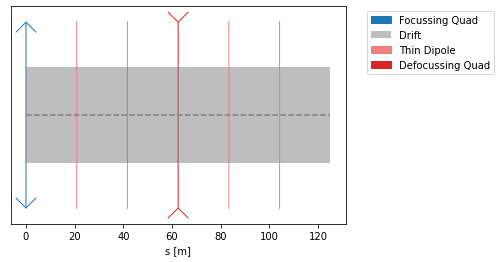

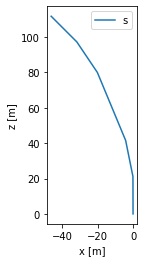

In [11]:
# let's have a look at our 'FODO'
FODO.plot.lattice()
FODO.plot.top_down()

In [12]:
# We repeat it to create the full lattice
lattice = FODO * n_cells

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='x [m]', ylabel='z [m]'>)

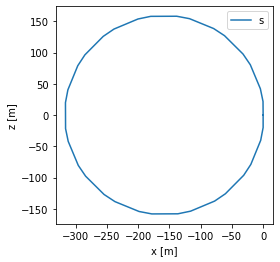

In [13]:
lattice.plot.top_down()

In [14]:
from accelerator.utils import compute_twiss_invariant
twiss_initial = FODO.m_h.twiss.invariant
twiss_initial

In [15]:
FODO

[Quadrupole(f=224.97187851518558, name='quad_f'),
 Drift(l=20.833333333333332, name='drift_0'),
 DipoleThin(theta=0.19634954084936207, name='dipole_thin_0'),
 Drift(l=20.833333333333332, name='drift_0'),
 DipoleThin(theta=0.19634954084936207, name='dipole_thin_0'),
 Drift(l=20.833333333333332, name='drift_0'),
 Quadrupole(f=-112.48593925759279, name='quad_d'),
 Drift(l=20.833333333333332, name='drift_0'),
 DipoleThin(theta=0.19634954084936207, name='dipole_thin_0'),
 Drift(l=20.833333333333332, name='drift_0'),
 DipoleThin(theta=0.19634954084936207, name='dipole_thin_0'),
 Drift(l=20.833333333333332, name='drift_0')]

In [16]:
initial_twiss / np.sqrt(compute_twiss_clojure(intitial_twiss))

NameError: name 'initial_twiss' is not defined

In [ ]:
np.linalg.eig(lattice.m_h.twiss)